In [9]:
import Returns as rt
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
tickers = ['AMZN','CVX','CCL','MAR']
date_from = '2020-01-02'
df = None

for i in tickers:
    df_t = rt.main(i,'Daily')
    df_t = df_t[df_t.index >= '2020-01-01']
    df_t.loc[df_t.index == '2020-01-02', 'performance'] = 100
    df_t['volatility'] = (((df_t.Return / 100) + 1).expanding().std()) * 100
    
    df_t.sort_values(by='Date',inplace=True)
    df_t.reset_index(inplace=True)

    for idx in range(1,len(df_t)):
        df_t.loc[idx, 'performance'] = df_t.loc[idx - 1, 'performance'] * ((df_t.loc[idx, 'Return'] / 100) + 1)
    
    if df is None:
        df = df_t
    else:
        df = pd.concat([df,df_t])

df.set_index(['Date','Ticker'],inplace=True)
        
df.head()

,,ReturnPeriod,Close,Dividends,DeltaPrice,Delta,Return,performance,volatility
Date,Ticker,,,,,,,,
2020-01-02,AMZN,Daily,1898.01,0.0,50.17,50.17,2.715062,100.000000,2.868458
2020-01-03,AMZN,Daily,1874.97,0.0,-23.04,-23.04,-1.213903,98.786097,2.873362
2020-01-06,AMZN,Daily,1902.88,0.0,27.91,27.91,1.488557,100.256585,2.885366
2020-01-07,AMZN,Daily,1906.86,0.0,3.98,3.98,0.209157,100.466278,2.899464
2020-01-08,AMZN,Daily,1891.97,0.0,-14.89,-14.89,-0.780865,99.681772,2.916654


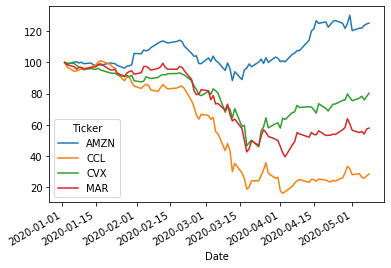

In [57]:
df_p = df.pivot_table(index='Date',columns='Ticker',values='performance')

df_p.plot(sharey=True)

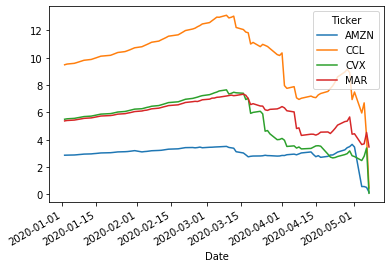

In [58]:
df_p = df.pivot_table(index='Date',columns='Ticker',values='volatility')

df_p.plot(sharey=True)